# Telecom Churn Case Study

In [751]:
#importing pandas & numpy
import numpy as np
import pandas as pd

In [752]:
churn_data=pd.read_csv('churn_data.csv')

In [753]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [754]:
customer_data=pd.read_csv('customer_data.csv')

In [755]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [756]:
internet_data=pd.read_csv('internet_data.csv')

In [757]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [758]:
df_1= pd.merge(churn_data,customer_data,how='inner',on='customerID')

Combining all data files into one consolidated dataframe (master dataset).

In [759]:
telecom=pd.merge(df_1,internet_data,how='inner',on='customerID')

In [760]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [761]:
telecom.shape

(7043, 21)

# Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [762]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def binary_map(x):
    return x.map({'Yes':1,'No':0})
telecom[varlist]=telecom[varlist].apply(binary_map)

In [763]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [764]:
varlist=['Contract','PaymentMethod','gender','InternetService']

In [765]:
dummy=pd.get_dummies(telecom[varlist],drop_first=True)
telecom=pd.concat([telecom,dummy],axis=1)

In [766]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [767]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [768]:
telecom.dtypes

customerID                                object
tenure                                     int64
PhoneService                               int64
Contract                                  object
PaperlessBilling                           int64
PaymentMethod                             object
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
gender                                    object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
MultipleLines                             object
InternetService                           object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies     

Creating dummy variables for the remaining categorical variables and dropping the leve

In [769]:
# Creating dummy variables for the variable 'MultipleLines'
ml= pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
ml_1=ml.drop('MultipleLines_No phone service',axis=1)


In [770]:
# Creating dummy variables for the variable 'OnlineSecurity'.
os= pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os_1=os.drop('OnlineSecurity_No internet service',axis=1)

In [771]:
# Creating dummy variables for the variable 'OnlineBackup'
ob=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob_1=ob.drop('OnlineBackup_No internet service',axis=1)

In [772]:
# Creating dummy variables for the variable 'DeviceProtection'
dp=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp_1=dp.drop('DeviceProtection_No internet service',axis=1)

In [773]:
# Creating dummy variables for the variable 'TechSupport'.
ts=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts_1=ts.drop('TechSupport_No internet service',axis=1)

In [774]:
# Creating dummy variables for the variable 'StreamingTV'.
st=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st_1=st.drop('StreamingTV_No internet service',axis=1)

In [775]:
# Creating dummy variables for the variable 'StreamingMovies'.
sm=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm_1=sm.drop('StreamingMovies_No internet service',axis=1)

In [776]:
# Adding the results to the master dataframe
telecom=pd.concat([telecom,ml_1],axis=1)
telecom=pd.concat([telecom,ob_1],axis=1)
telecom=pd.concat([telecom,os_1],axis=1)
telecom=pd.concat([telecom,ts_1],axis=1)
telecom=pd.concat([telecom,dp_1],axis=1)
telecom=pd.concat([telecom,st_1],axis=1)
telecom=pd.concat([telecom,sm_1],axis=1)

In [777]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


Dropping the repeated variables

In [778]:
telecom=telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','TechSupport','StreamingTV','StreamingMovies'],axis=1)

In [779]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [780]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [781]:
# Removing NaN TotalCharges rows
telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [782]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineBacku

In [783]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


# Test-Train Split

In [784]:
from sklearn.model_selection import train_test_split

In [785]:
# Putting feature variable to X
X=telecom.drop(['customerID','Churn'],axis=1)

In [786]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,No,Yes,...,1,0,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,Yes,No,...,0,1,1,0,0,1,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,Yes,Yes,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,Yes,No,...,0,1,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,No,No,...,1,0,1,0,1,0,1,0,1,0


In [787]:
X=telecom.drop(['customerID','Churn'],axis=1)

In [788]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,No,Yes,...,1,0,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,Yes,No,...,0,1,1,0,0,1,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,Yes,Yes,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,Yes,No,...,0,1,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,No,No,...,1,0,1,0,1,0,1,0,1,0


In [789]:
# Putting response variable to y
y=telecom['Churn']

In [790]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [791]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,random_state=100)

# Feature Scaling

In [792]:
from sklearn.preprocessing import StandardScaler

In [793]:
scaler= StandardScaler()
temp=['tenure','MonthlyCharges','TotalCharges']
X_train[temp]=scaler.fit_transform(X_train[temp])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,No,Yes,...,1,0,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,No,Yes,...,1,0,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,No,Yes,...,1,0,1,0,0,1,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,Yes,Yes,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,No,No,...,1,0,0,1,0,1,0,1,0,1


In [794]:
### Checking the Churn Rate
churn_rate= (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn_rate

26.578498293515356

Looking at Correlations

In [795]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [796]:
telecom.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,DeviceProtection_No,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.015683,0.381912,0.163386,0.202338,...,-0.265987,0.328297,-0.264363,0.325288,-0.314820,0.361520,-0.246814,0.280264,-0.252890,0.285402
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,0.008392,0.018397,-0.001078,-0.003142,...,-0.058546,-0.091676,-0.055102,-0.095138,-0.075421,-0.070076,-0.123159,-0.021383,-0.111273,-0.033477
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,0.156258,-0.013957,-0.110131,-0.052278,...,0.267592,-0.004051,0.229875,0.037536,0.166253,0.104079,0.046715,0.224241,0.058987,0.211583
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.219874,0.097825,-0.112343,0.004810,...,0.360220,0.296447,0.321267,0.338301,0.171057,0.482607,0.016015,0.629668,0.017271,0.627235
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.102411,0.319072,0.064653,0.170569,...,-0.064515,0.412619,-0.084270,0.432868,-0.189485,0.522881,-0.197144,0.515709,-0.202605,0.519867
Churn,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,0.150541,-0.149982,-0.163128,-0.178225,...,0.342235,-0.171270,0.336877,-0.164716,0.252056,-0.066193,0.128435,0.063254,0.130920,0.060860
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,1.000000,0.016957,-0.210550,-0.046491,...,0.185145,-0.038576,0.205254,-0.060577,0.094403,0.059514,0.048664,0.105445,0.034196,0.119842
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.016957,1.000000,0.452269,0.083067,...,-0.129394,0.143346,-0.108875,0.120206,-0.146702,0.153556,-0.123394,0.124483,-0.117488,0.118108
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,-0.210550,0.452269,1.000000,0.069222,...,-0.186979,0.080786,-0.171164,0.063053,-0.128053,0.013900,-0.099912,-0.016499,-0.078245,-0.038375
Contract_One year,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.178225,-0.046491,0.083067,0.069222,1.000000,...,-0.122360,0.100658,-0.118709,0.096258,-0.130038,0.102911,-0.093495,0.061930,-0.096613,0.064780


<AxesSubplot:>

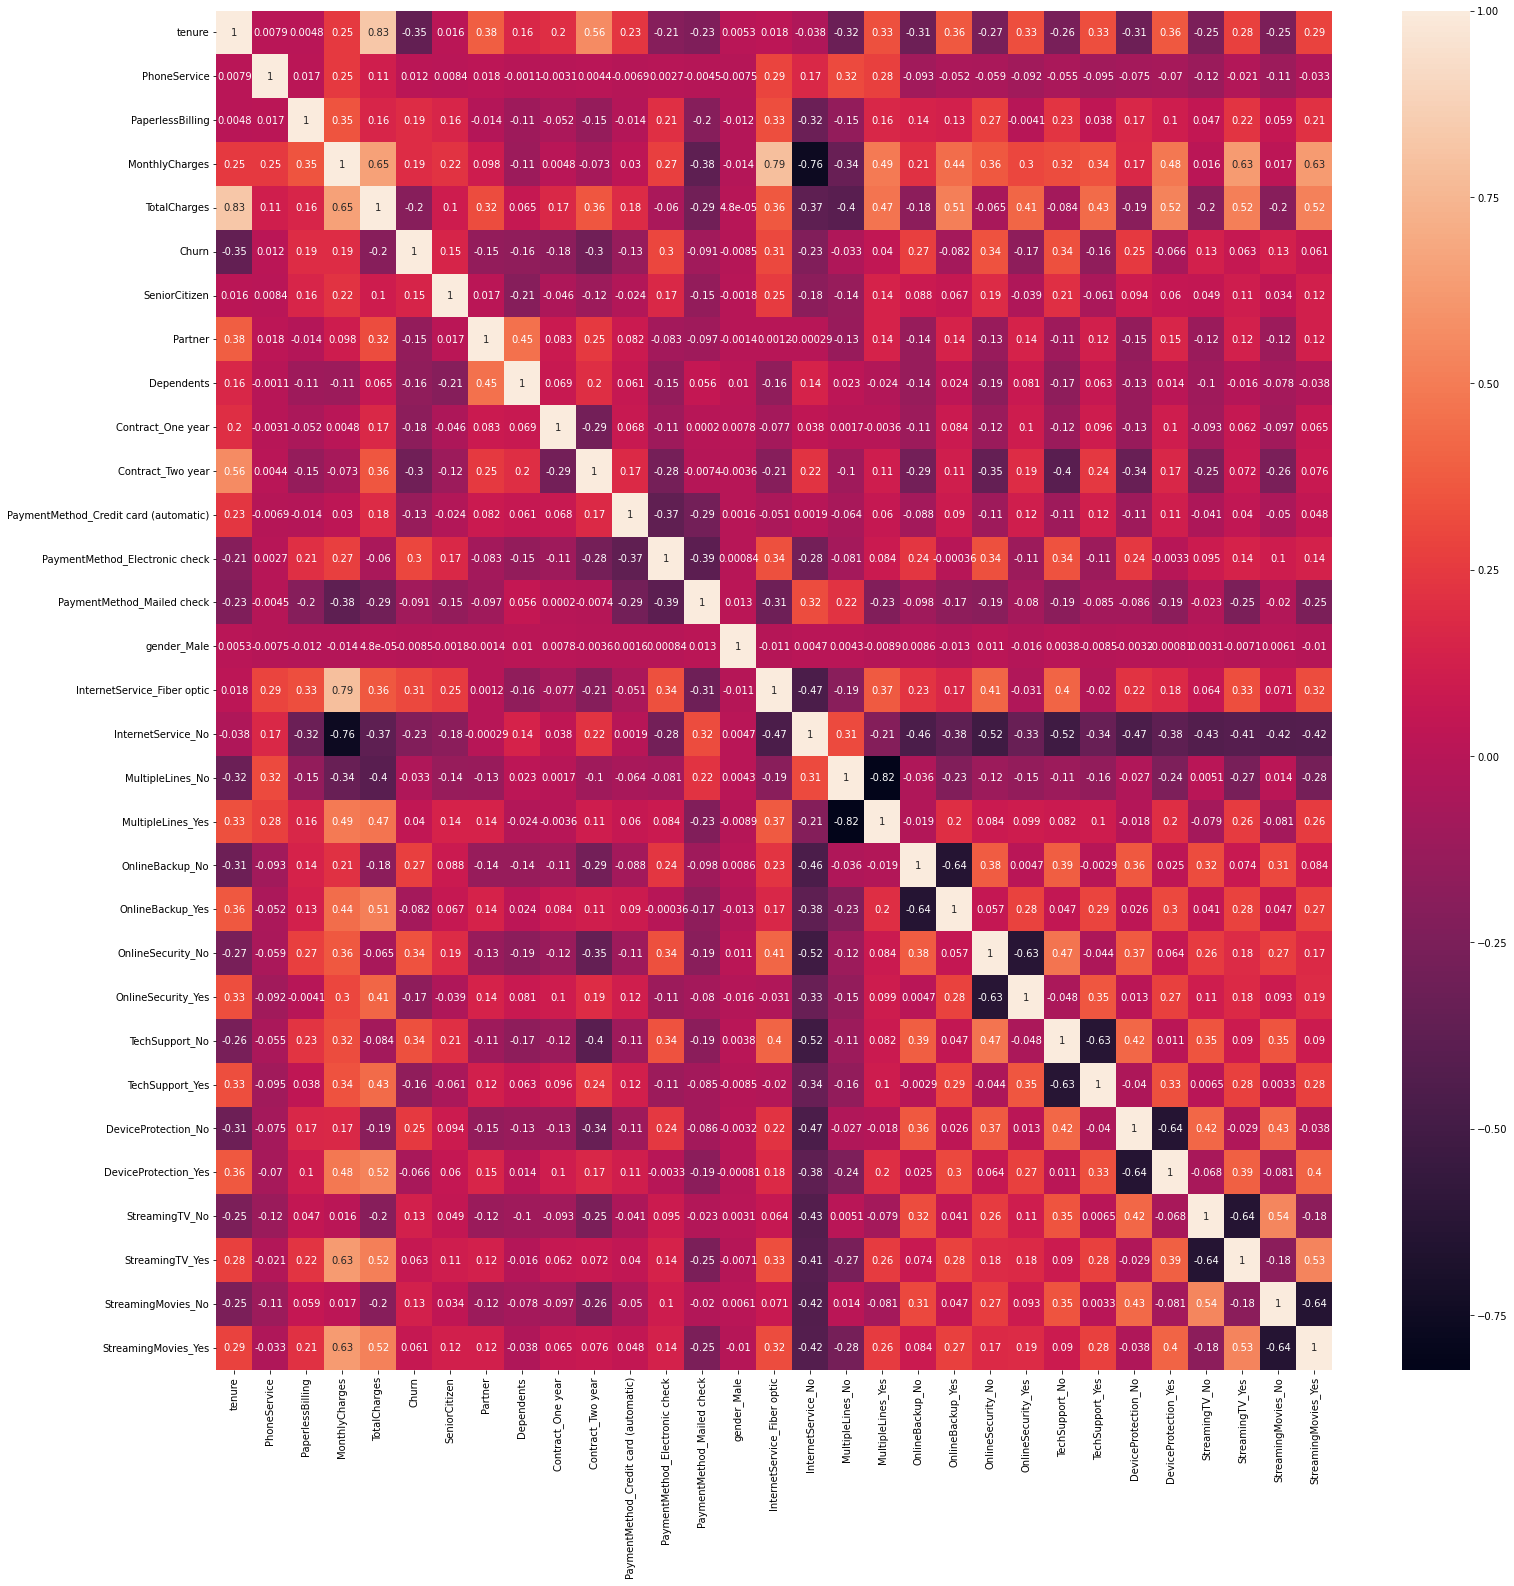

In [797]:
plt.figure(figsize=[25,25])
sns.heatmap(telecom.corr(),annot=True)


Dropping highly correlated dummy variables

In [798]:

X_train=X_train.drop(['MultipleLines_No',
'OnlineSecurity_No',
'OnlineBackup_No',
'DeviceProtection_No',
'TechSupport_No',
'StreamingTV_No',
'StreamingMovies_No'],1)

C:\Users\mishr\AppData\Local\Temp\ipykernel_33132\600108714.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train=X_train.drop(['MultipleLines_No',


In [799]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,TechSupport_Yes,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,No,Yes,...,1,0,0,1,1,0,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,No,Yes,...,0,0,0,0,1,0,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,No,Yes,...,0,1,0,0,1,0,0,1,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,Yes,Yes,...,1,1,0,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,No,No,...,0,1,0,0,0,0,1,1,1,1


In [800]:
X_test=X_test.drop(['MultipleLines_No',
'OnlineSecurity_No',
'OnlineBackup_No',
'DeviceProtection_No',
'TechSupport_No',
'StreamingTV_No',
'StreamingMovies_No'],axis=1)

In [801]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,TechSupport_Yes,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,24,1,1,79.85,2001.00,0,0,0,No,No,...,1,1,0,0,0,0,0,0,0,1
3730,57,1,1,104.50,5921.35,0,1,0,No,Yes,...,0,1,0,1,1,0,0,1,1,1
1761,58,1,1,24.45,1513.60,0,0,0,No internet service,No internet service,...,1,0,1,1,0,0,0,0,0,0
2283,1,1,1,71.55,71.55,0,0,0,No,No,...,1,1,0,0,0,0,0,0,0,0
1872,41,1,0,19.70,804.25,0,1,1,No internet service,No internet service,...,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:>

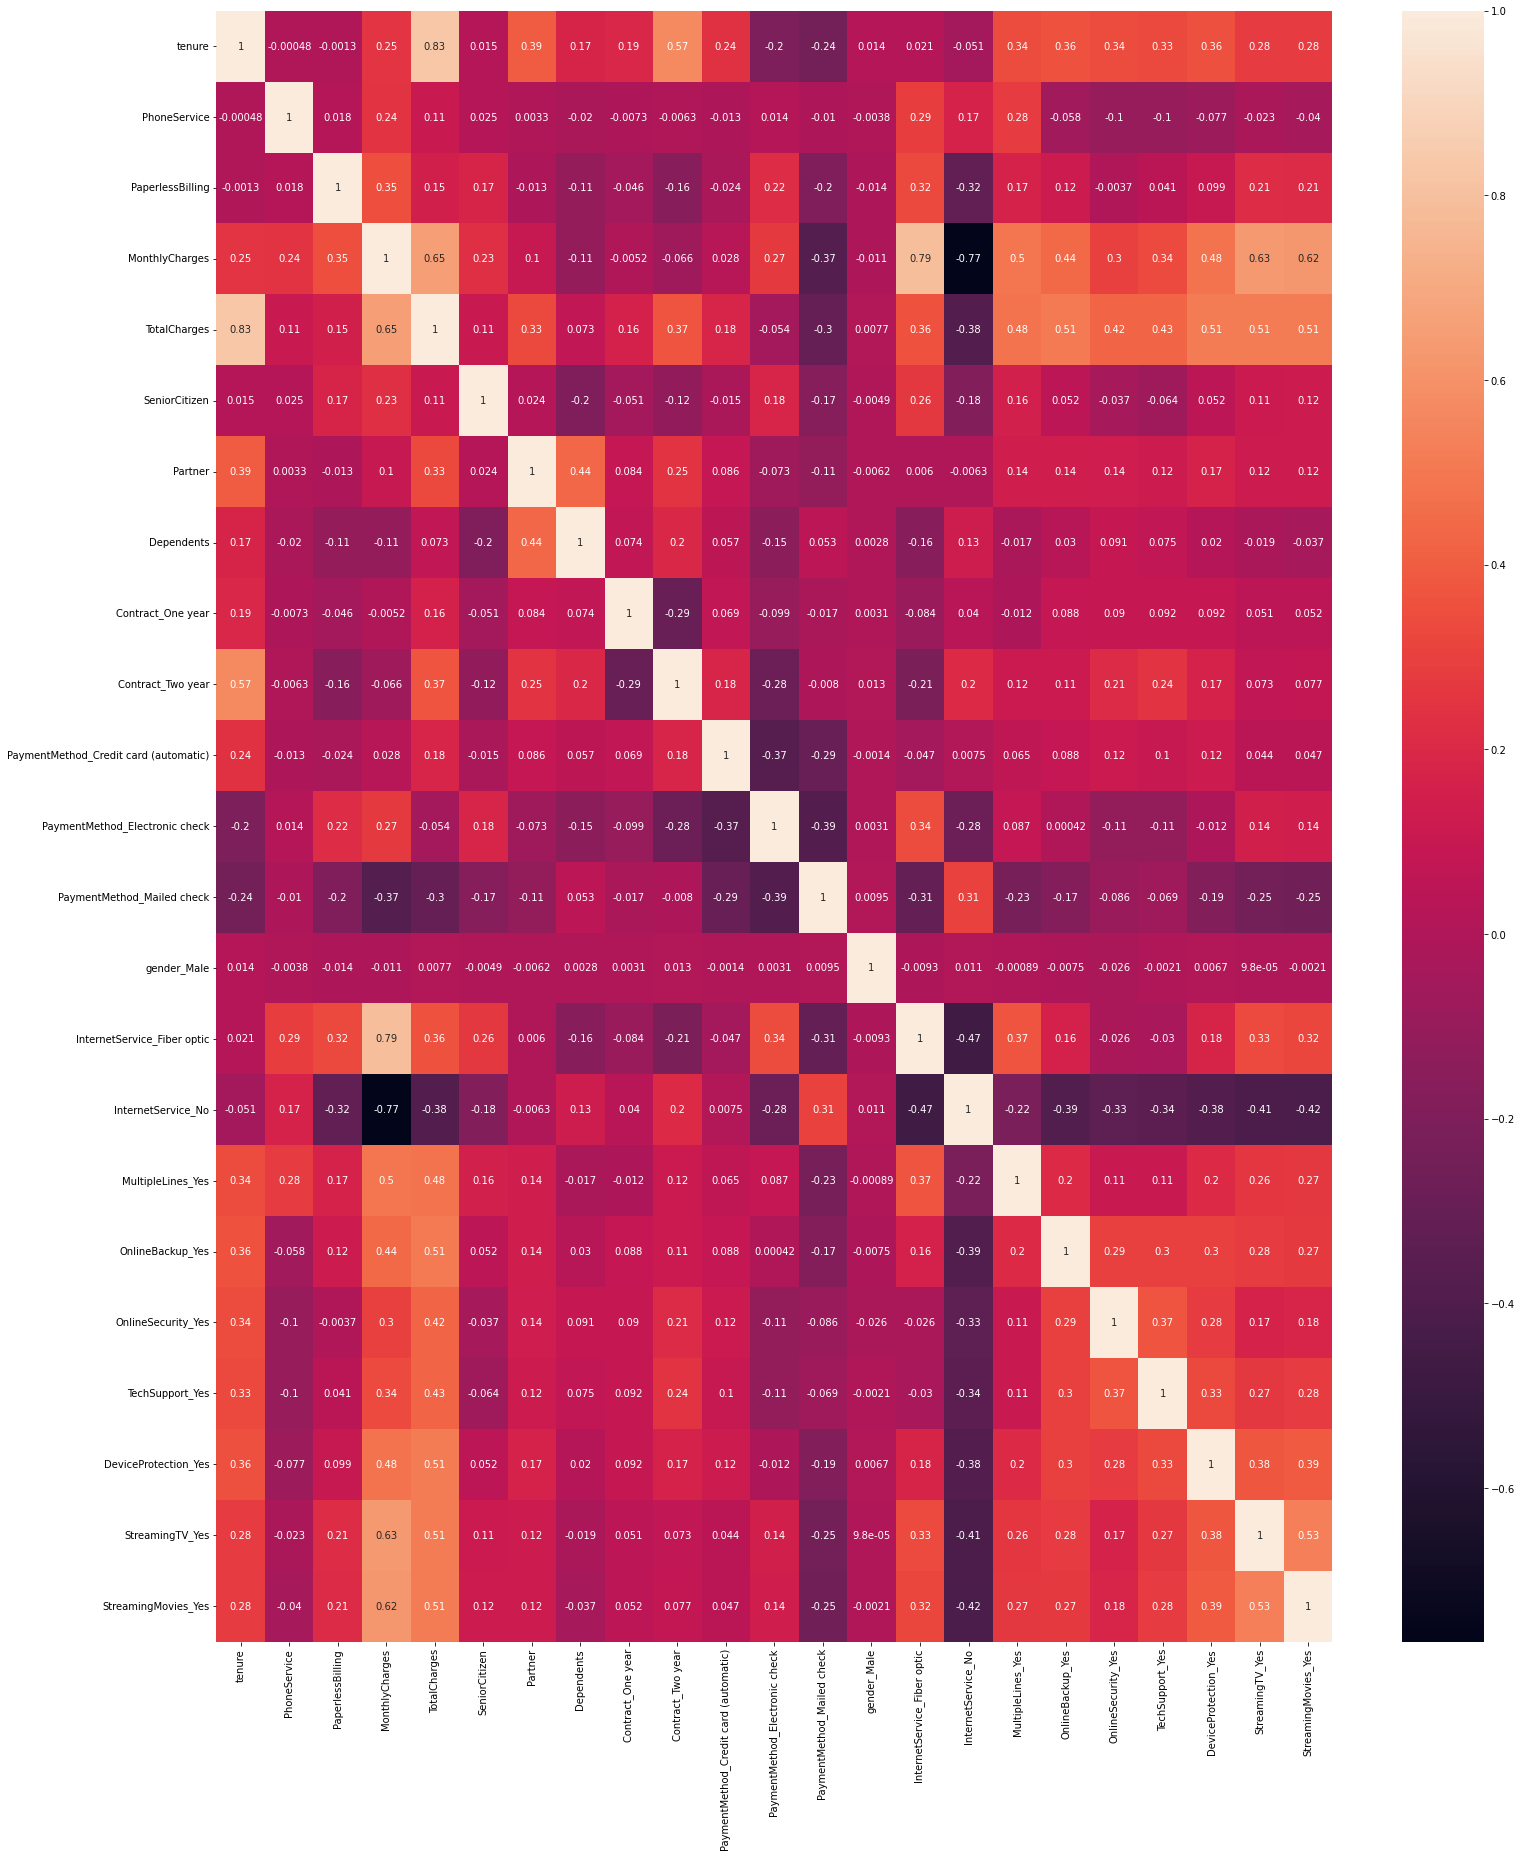

In [802]:
#After dropping highly correlated variables now let's check the correlation matrix again.
plt.figure(figsize=[25,30])
sns.heatmap(X_train.corr(),annot=True)


# Model Building
Let's start by splitting our data into a training set and a test set.

In [803]:
import statsmodels.api as sm

In [804]:
X_train=X_train.drop(['DeviceProtection','OnlineBackup','OnlineSecurity'],axis=1)

In [805]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,TechSupport_Yes,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,1


Logistic regression model

In [806]:
sm_X_train=sm.add_constant(X_train)


In [807]:
logml=sm.GLM(y_train,sm_X_train,family= sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 10 Jan 2023   Deviance:                       4009.4
Time:                        23:48:15   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Recursive Feature Elimination (RFE)


In [808]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [809]:
from sklearn.feature_selection import RFE
rfe= RFE(estimator=logreg,n_features_to_select=15)        # running RFE with 15 variables as output
rfe= rfe.fit(X_train,y_train)

In [810]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True])

In [811]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineBackup_Yes', False, 5),
 ('OnlineSecurity_Yes', False, 2),
 ('TechSupport_Yes', True, 1),
 ('DeviceProtection_Yes', False, 9),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [812]:
col= X_train.columns[rfe.support_]

In [813]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineBackup_Yes',
       'OnlineSecurity_Yes', 'DeviceProtection_Yes'],
      dtype='object')

Assessing the model with StatsModels

In [814]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Tue, 10 Jan 2023   Deviance:                       4022.2
Time:                        23:48:16   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [815]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [816]:
y_train_pred[:10].values.reshape(-1)

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [817]:
y_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_pred_final['CustID']=y_train.index
y_pred_final.head()

,Churn,Churn_prob,CustID
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [818]:
y_pred_final['Predicted']=y_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [819]:
from sklearn import metrics
# Confusion matrix 
confusion= metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.Predicted)
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [820]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [821]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.Predicted)

0.8102397399431126

# Checking VIFs


In [822]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [823]:
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [824]:
col=col.drop('MonthlyCharges',1)

In [825]:
logml3=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res=logml3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Tue, 10 Jan 2023   Deviance:                       4046.2
Time:                        23:48:17   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [826]:
#after dropping columns MonthlyCharges and model creation cheking VIF again
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [827]:
col=col.drop('TotalCharges',1)

In [828]:
X_train_sm = sm.add_constant(X_train[col])
logml4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logml4.fit()

In [829]:
# Again VIF Checking
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [830]:
y_train_pred=res.predict(X_train_sm)
y_train_pred

879     0.245817
5790    0.265361
6498    0.669410
880     0.630970
2784    0.682916
          ...   
79      0.024976
3934    0.095470
5964    0.063184
6947    0.100672
5649    0.048357
Length: 4922, dtype: float64

In [831]:
y_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [832]:
y_pred_final['Churn_prob']=y_train_pred

In [833]:
y_pred_final['Predicted']=y_pred_final.Churn_prob.map(lambda a: 1 if a>0.5 else 0)

In [834]:
y_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
879,0,0.245817,879,0
5790,0,0.265361,5790,0
6498,1,0.669410,6498,1
880,1,0.630970,880,1
2784,1,0.682916,2784,1


In [835]:
confusion= metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.Predicted)
print(confusion)

[[3278  357]
 [ 597  690]]


In [836]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.Predicted)

0.8061763510767981

So overall the accuracy hasn't dropped much.

# Checking specificity & sensitivity 

In [837]:
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]
TN=confusion[0,0]

In [838]:
#sensitivity
TP/float(TP+FN)

0.5361305361305362

In [839]:
#specificity
TN/float(TN+FP)

0.9017881705639614

In [840]:
## Calculate false postive rate - predicting churn when customer does not have churned
FPR= FP/float(TN+FP)

In [841]:
FPR*100

9.821182943603851

In [842]:
# positive predictive value 
TP/float(TP+FP)



0.6590257879656161

In [843]:
# Negative predictive value
TN/float(TN+FN)

0.8459354838709677

# Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in    sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border    of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the    less accurate the test.

In [844]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [845]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_prob, drop_intermediate = False )


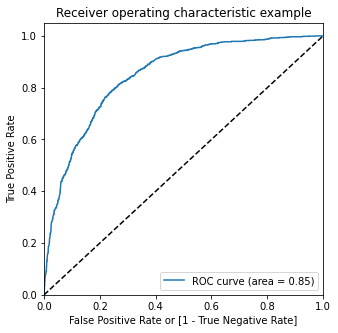

In [846]:
draw_roc(y_pred_final.Churn, y_pred_final.Churn_prob)

#  Finding the optimal cutoff


In [847]:
# Let's create columns with different probability cutoffs
number=[float(x)/10 for x in range(10)]
for i in number:
    y_pred_final[i]=y_pred_final.Churn_prob.map(lambda x:1 if x>i else 0)
y_pred_final.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [848]:
# Now let's calculate accuracy sensitivity and specificity for various probability 
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final[i])
    total=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total
    speci= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi= cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


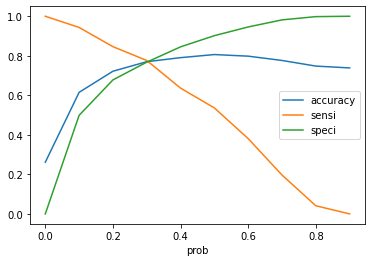

In [849]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [850]:
y_pred_final.head() 

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [851]:
y_pred_final['final_Predicted']=y_pred_final.Churn_prob.map(lambda x:1 if x>0.3 else 0)

In [852]:
y_pred_final.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
879,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
2784,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [853]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_Predicted)

0.7700121901665989

In [854]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_Predicted )
confusion2

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [855]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [856]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [857]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

# Precision && Recall

In [858]:
# Precision && Recall
confusion=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.Predicted)

In [859]:
from sklearn.metrics import precision_score,recall_score

In [860]:
precision_score(y_pred_final.Churn,y_pred_final.Predicted)

0.6590257879656161

In [861]:
recall_score(y_pred_final.Churn,y_pred_final.Predicted)

0.5361305361305362

Precision and recall tradeoff

In [862]:
from sklearn.metrics import precision_recall_curve

In [863]:
y_pred_final.Churn,y_pred_final.Predicted

(879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: Churn, Length: 4922, dtype: int64,
 879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: Predicted, Length: 4922, dtype: int64)

In [864]:
p,r,thresholds= precision_recall_curve(y_pred_final.Churn,y_pred_final.Churn_prob)

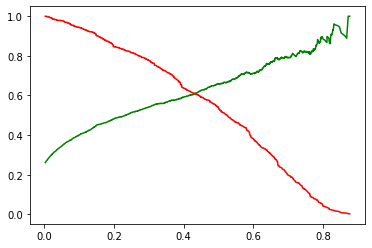

In [865]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

# Making predictions on the test set


In [866]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,TechSupport_Yes,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,24,1,1,79.85,2001.00,0,0,0,No,No,...,1,1,0,0,0,0,0,0,0,1
3730,57,1,1,104.50,5921.35,0,1,0,No,Yes,...,0,1,0,1,1,0,0,1,1,1
1761,58,1,1,24.45,1513.60,0,0,0,No internet service,No internet service,...,1,0,1,1,0,0,0,0,0,0
2283,1,1,1,71.55,71.55,0,0,0,No,No,...,1,1,0,0,0,0,0,0,0,0
1872,41,1,0,19.70,804.25,0,1,1,No internet service,No internet service,...,0,0,1,0,0,0,0,0,0,0


In [867]:
X_test=X_test.drop(['OnlineSecurity','OnlineBackup','DeviceProtection'],1)

C:\Users\mishr\AppData\Local\Temp\ipykernel_33132\4159616162.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test=X_test.drop(['OnlineSecurity','OnlineBackup','DeviceProtection'],1)


In [868]:
var=['tenure','MonthlyCharges','TotalCharges']
X_test[var]=scaler.transform(X_test[var])

In [869]:
X_test=X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,0,1
3730,0.999203,1,0,0,0,1,0,1,0,1,0,1,1
1761,1.040015,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0,0


In [870]:
X_test_sm=sm.add_constant(X_test)

In [871]:
y_test_final=res.predict(X_test_sm)

In [872]:
y_test_final[:10]

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
1970    0.692893
2532    0.285289
1616    0.008994
2485    0.602307
5914    0.145153
dtype: float64

In [873]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_final)

In [874]:
# Let's see the head
y_pred_1

,0
942,0.419725
3730,0.260232
1761,0.008650
2283,0.592626
1872,0.013989
...,...
1289,0.023041
3508,0.054121
6765,0.008348
3598,0.503619


In [875]:
# Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [876]:
y_test_df['CustID'] = y_test_df.index

In [877]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [878]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [879]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.419725
1,1,3730,0.260232
2,0,1761,0.008650
3,1,2283,0.592626
4,0,1872,0.013989


In [880]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [881]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [882]:
y_pred_final.head()


,CustID,Churn,Churn_Prob
0,942,0,0.419725
1,3730,1,0.260232
2,1761,0,0.008650
3,2283,1,0.592626
4,1872,0,0.013989


In [883]:
#cuttoff based on curve precision & Recall
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [884]:
y_pred_final

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.419725,0
1,3730,1,0.260232,0
2,1761,0,0.008650,0
3,2283,1,0.592626,1
4,1872,0,0.013989,0
...,...,...,...,...
2105,1289,0,0.023041,0
2106,3508,0,0.054121,0
2107,6765,0,0.008348,0
2108,3598,0,0.503619,1


In [885]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.7838862559241706

In [886]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1286,  242],
       [ 214,  368]], dtype=int64)

In [887]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [888]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6323024054982818

In [889]:
# Let us calculate specificity
TN / float(TN+FP)

0.8416230366492147